# House Price Prediction

This data science project focuses on predicting house prices using a dataset containing various features and attributes related to residential properties. By analyzing and modeling the data, the project aims to develop a predictive model that can estimate the sale prices of houses accurately.

## Dataset Information
The dataset used in this project consists of information about different residential properties. It includes a wide range of features that can potentially influence the price of a house, such as the number of bedrooms, bathrooms, square footage, location, neighborhood characteristics, and other relevant factors.

## Objective
The main objective of this project is to leverage machine learning techniques to build a robust predictive model for house price estimation. By training the model on historical data and leveraging its learned patterns and relationships, it will be able to predict the prices of new or unseen houses accurately.

## Approach
The project will involve several steps, including data preprocessing, exploratory data analysis, feature engineering, model selection, and evaluation. Techniques such as data cleaning, handling missing values, feature scaling, and encoding categorical variables will be employed to prepare the dataset for model training. Various regression algorithms, such as linear regression, random forests will be explored and evaluated to determine the most suitable model for accurate price prediction.

## Impact
Accurate house price prediction can have significant implications for various stakeholders, including homebuyers, sellers, real estate agents, and investors. With an effective predictive model, prospective buyers can make informed decisions about property investments, sellers can set competitive prices, and agents can provide better guidance to their clients. Additionally, investors can use the predicted prices to identify profitable opportunities in the real estate market.

Through this project, insights and patterns in the housing market can be uncovered, allowing for a better understanding of the factors influencing house prices and facilitating more informed decision-making in the real estate industry.



In [1]:
## importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Loading the dataset
df=pd.read_csv("home_data.csv")

In [3]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
df.shape

(21613, 21)

In [6]:
df.drop(["id","date"],axis=1,inplace=True)
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  int64  
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  zipcode        21613 non-null  int64  
 15  lat            21613 non-null  float64
 16  long           21613 non-null  float64
 17  sqft_living15  21613 non-null  int64  
 18  sqft_l

In [9]:
df.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [10]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [11]:
df.nunique()

price            4032
bedrooms           13
bathrooms          30
sqft_living      1038
sqft_lot         9782
floors              6
waterfront          2
view                5
condition           5
grade              12
sqft_above        946
sqft_basement     306
yr_built          116
yr_renovated       70
zipcode            70
lat              5034
long              752
sqft_living15     777
sqft_lot15       8689
dtype: int64

## Data preprocessing

In [12]:
# changing the float datatype to inteager datatype
df["bathrooms"]=df["bathrooms"].astype(int)
df["floors"]=df["floors"].astype(int)

In [19]:
# Rename the column from "yr_build" to "age"
df.rename(columns={"yr_built": "age"}, inplace=True)


In [20]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [21]:
# Calculate the actual age based on the year of construction
current_year = 2023
df["age"] = current_year - df["age"]

In [22]:
# changing the column name yr_renovated to renovated and changing the value to 0 to 1
df.rename(columns={"yr_renovated":"renovated"},inplace=True)
df["renovated"]=df["renovated"].apply(lambda x:0 if x==0 else 1)

In [23]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,72,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,90,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,58,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,36,0,98074,47.6168,-122.045,1800,7503


## Exploratory Data Analysis

In [24]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308350,0.510072,0.702035,0.089661,0.237211,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.054012,0.126092,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308350,1.000000,0.467452,0.576671,0.031703,0.155643,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.154178,0.018553,-0.152668,-0.008931,0.129473,0.391638,0.029244
bathrooms,0.510072,0.467452,1.000000,0.697875,0.085310,0.484822,0.058798,0.177257,-0.126016,0.606631,0.639933,0.250880,-0.433647,0.059989,-0.159773,0.031351,0.179351,0.510049,0.080779
sqft_living,0.702035,0.576671,0.697875,1.000000,0.172826,0.353321,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.318049,0.055094,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.031703,0.085310,0.172826,1.000000,-0.008951,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.053080,0.007745,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.237211,0.155643,0.484822,0.353321,-0.008951,1.000000,0.019640,0.024658,-0.293173,0.472608,0.517913,-0.235836,-0.578619,-0.007848,-0.096743,0.029567,0.159001,0.296561,-0.013252
waterfront,0.266369,-0.006582,0.058798,0.103818,0.021604,0.019640,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.026161,0.093294,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.079532,0.177257,0.284611,0.074710,0.024658,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.053440,0.104062,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.028472,-0.126016,-0.058753,-0.008958,-0.293173,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.361417,-0.060139,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356967,0.606631,0.762704,0.113621,0.472608,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,-0.446963,0.014008,-0.184862,0.114084,0.198372,0.713202,0.119248


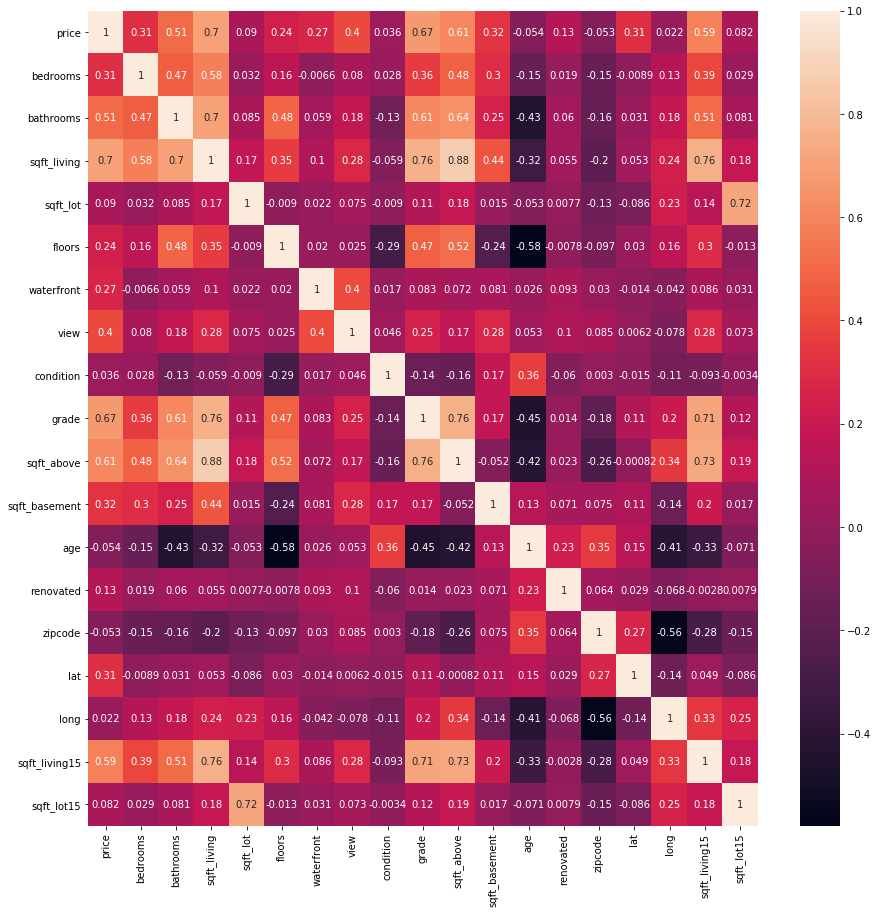

In [26]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True)

### Visualising the correlation with price

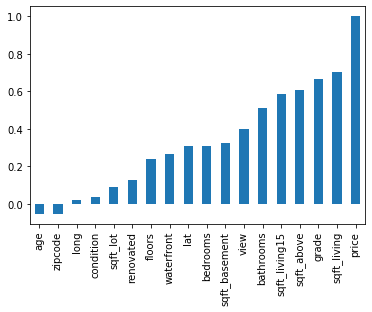

In [30]:
df.corr()["price"][:-1].sort_values().plot(kind="bar")

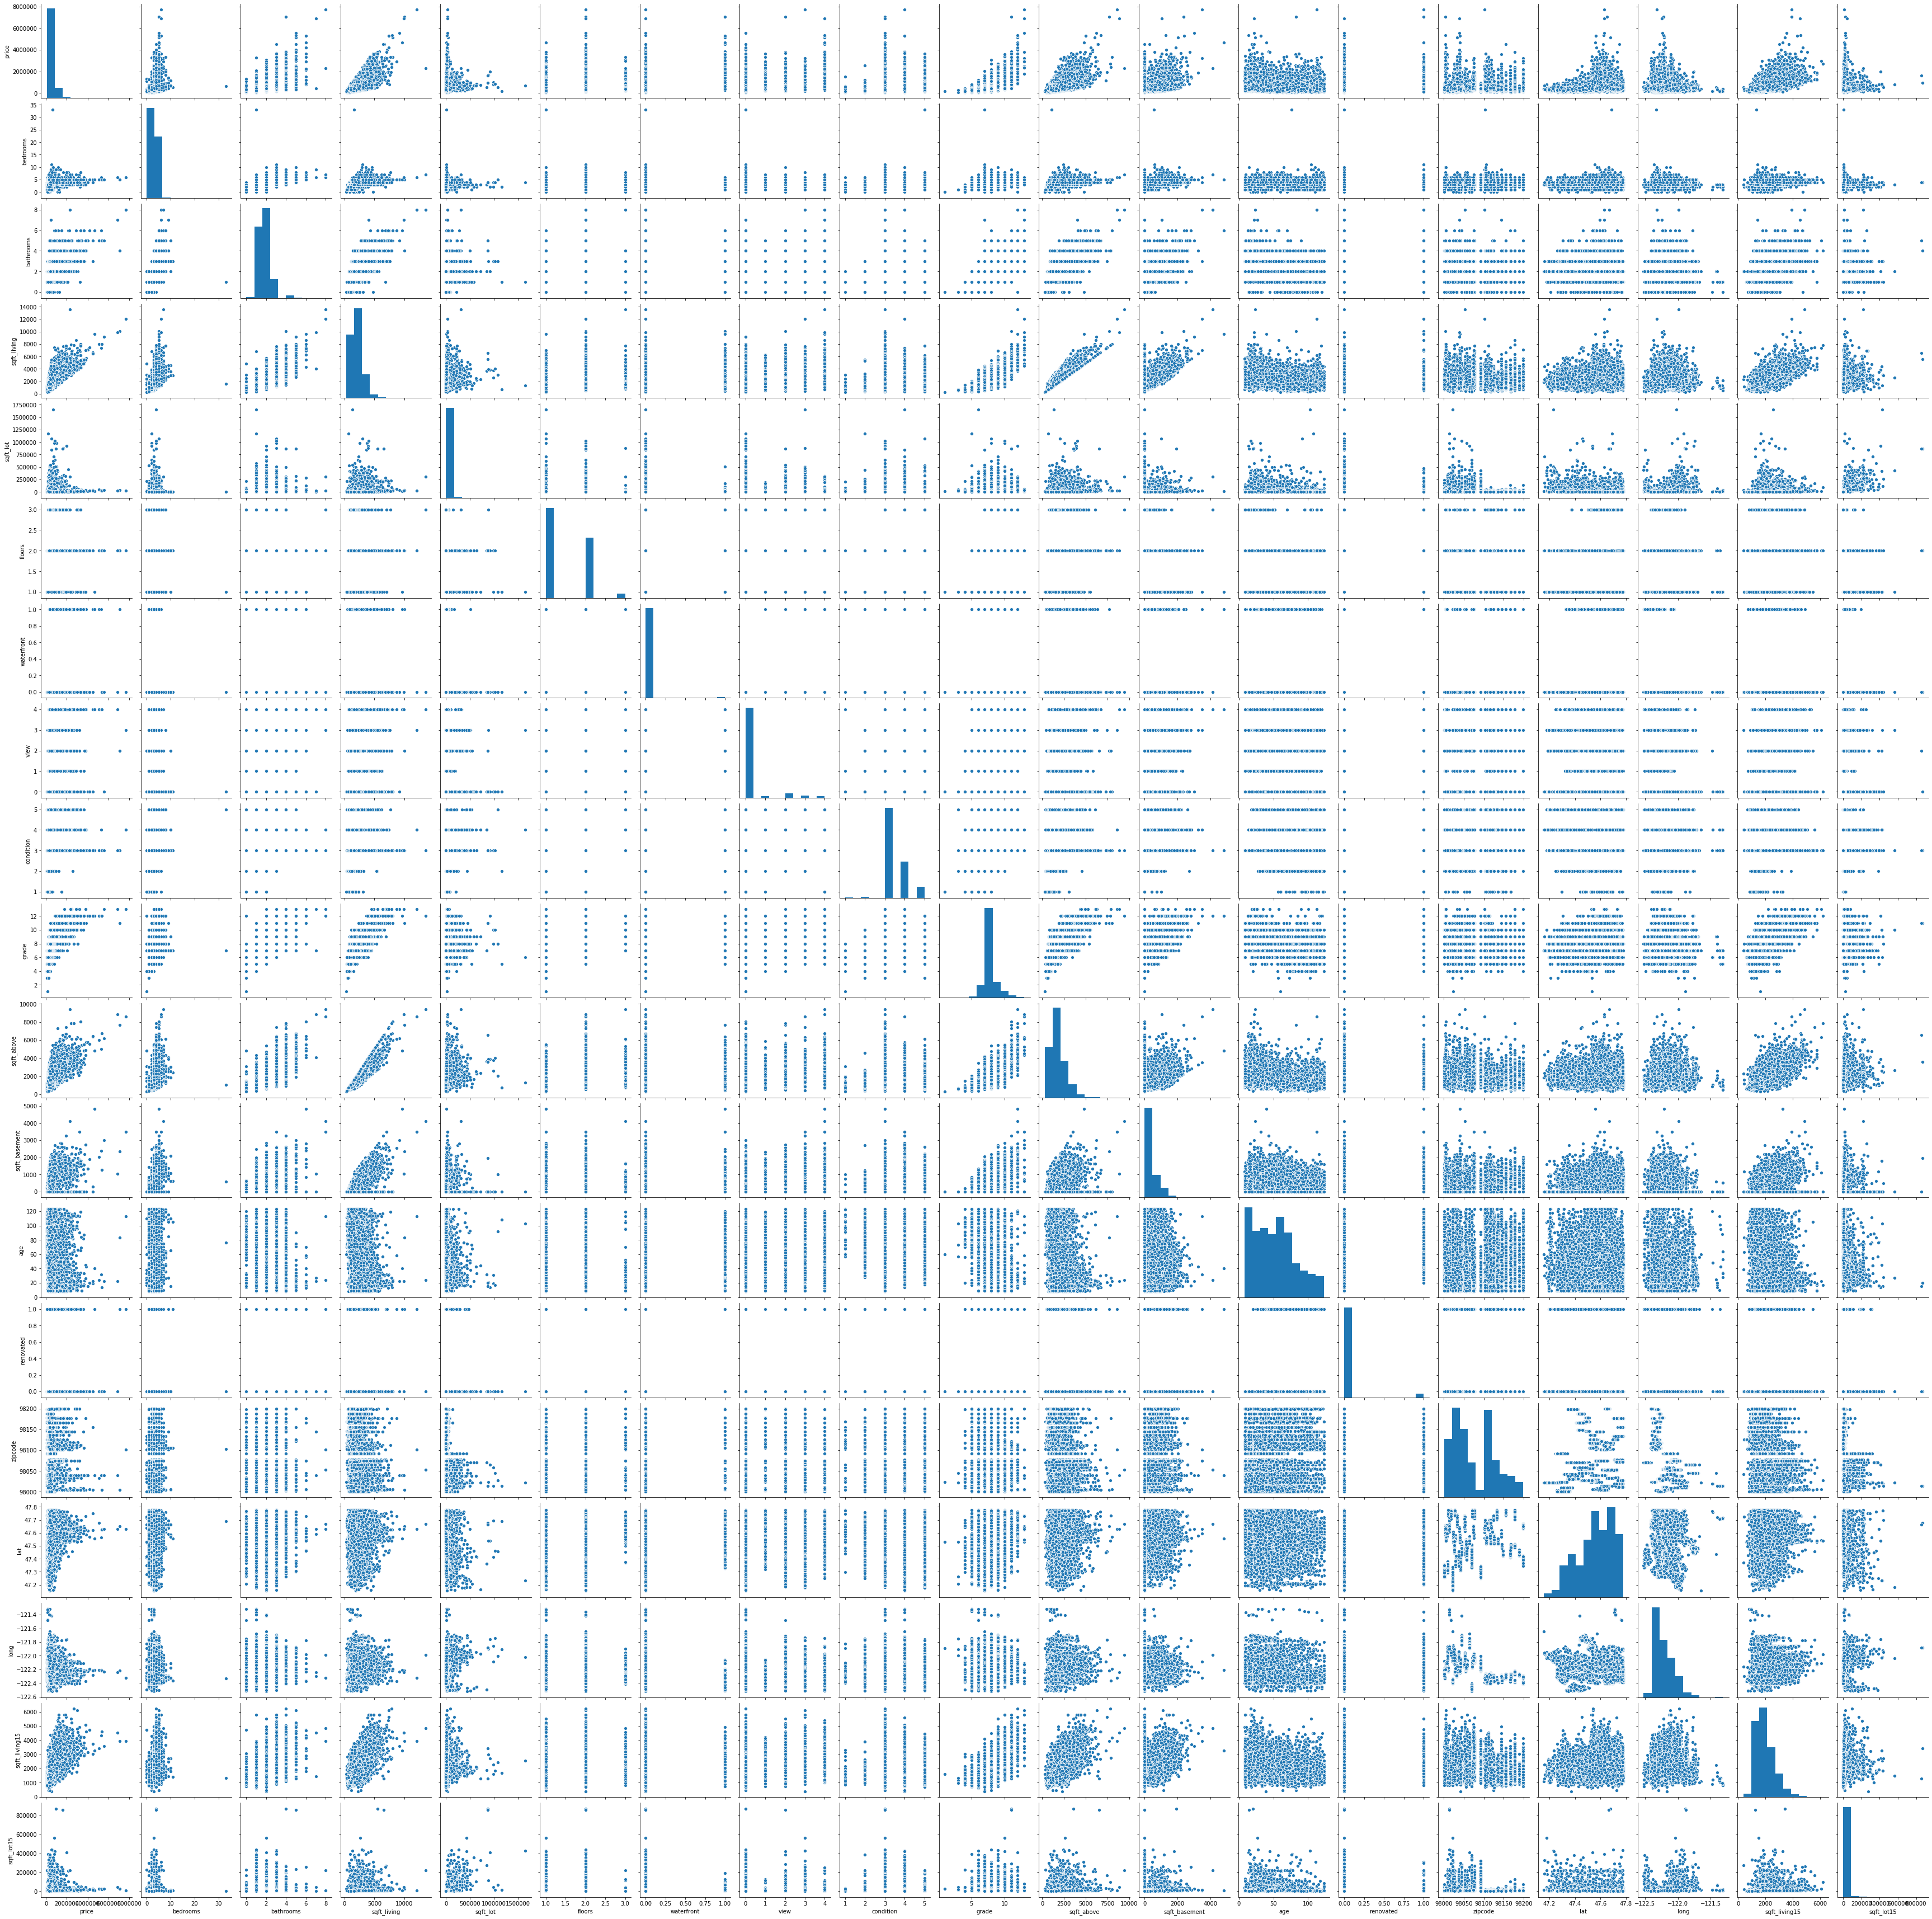

In [32]:
sns.pairplot(df)

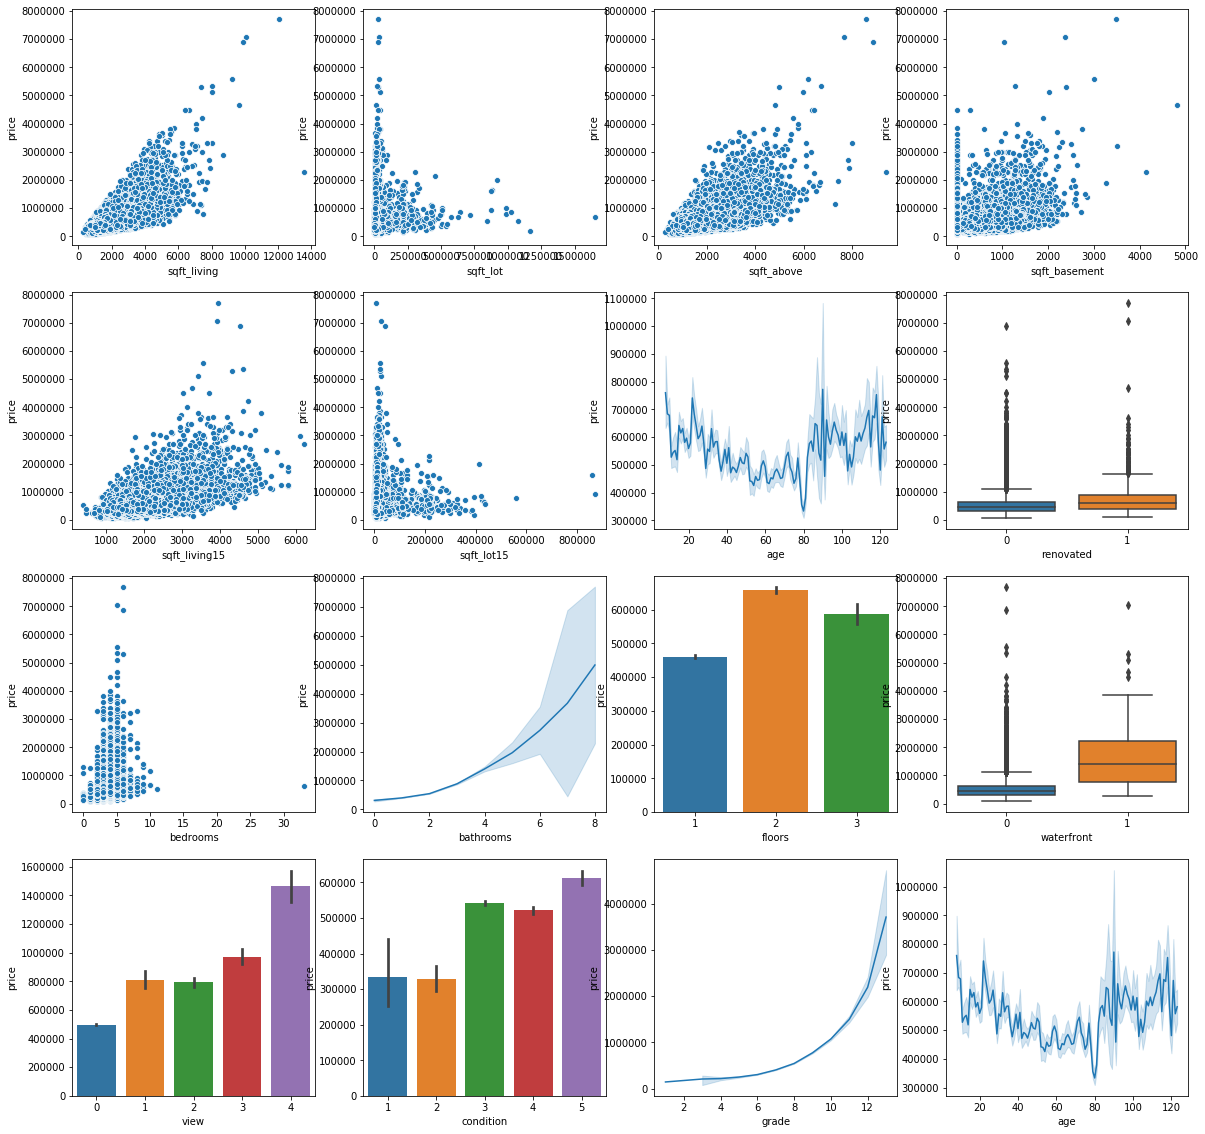

In [45]:
# visualisation the relationship between price and sqft_living, sqft_lot, sqft_above, sqft_basement, sqft_living15, sqft_lot15, age, renovated, bedrooms, bathrooms, floors, waterfront, view, condition, grade
fig,ax=plt.subplots(4,4,figsize=(20,20))
sns.scatterplot(x="sqft_living",y="price",data=df,ax=ax[0][0])
sns.scatterplot(x="sqft_lot",y="price",data=df,ax=ax[0][1])
sns.scatterplot(x="sqft_above",y="price",data=df,ax=ax[0][2])
sns.scatterplot(x="sqft_basement",y="price",data=df,ax=ax[0][3])
sns.scatterplot(x="sqft_living15",y="price",data=df,ax=ax[1][0])
sns.scatterplot(x="sqft_lot15",y="price",data=df,ax=ax[1][1])
sns.lineplot(x="age",y="price",data=df,ax=ax[1][2])
sns.boxplot(x="renovated",y="price",data=df,ax=ax[1][3])
sns.scatterplot(x="bedrooms",y="price",data=df,ax=ax[2][0])
sns.lineplot(x="bathrooms",y="price",data=df,ax=ax[2][1])
sns.barplot(x="floors",y="price",data=df,ax=ax[2][2])
sns.boxplot(x="waterfront",y="price",data=df,ax=ax[2][3])
sns.barplot(x="view",y="price",data=df,ax=ax[3][0])
sns.barplot(x="condition",y="price",data=df,ax=ax[3][1])
sns.lineplot(x="grade",y="price",data=df,ax=ax[3][2])
sns.lineplot(x="age",y="price",data=df,ax=ax[3][3])



In [46]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900,3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650
1,538000,3,2,2570,7242,2,0,0,3,7,2170,400,72,1,98125,47.7210,-122.319,1690,7639
2,180000,2,1,770,10000,1,0,0,3,6,770,0,90,0,98028,47.7379,-122.233,2720,8062
3,604000,4,3,1960,5000,1,0,0,5,7,1050,910,58,0,98136,47.5208,-122.393,1360,5000
4,510000,3,2,1680,8080,1,0,0,3,8,1680,0,36,0,98074,47.6168,-122.045,1800,7503


In [47]:
## Splitting the data
X=df.drop("price",axis=1)
y=df["price"]

In [48]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650
1,3,2,2570,7242,2,0,0,3,7,2170,400,72,1,98125,47.7210,-122.319,1690,7639
2,2,1,770,10000,1,0,0,3,6,770,0,90,0,98028,47.7379,-122.233,2720,8062
3,4,3,1960,5000,1,0,0,5,7,1050,910,58,0,98136,47.5208,-122.393,1360,5000
4,3,2,1680,8080,1,0,0,3,8,1680,0,36,0,98074,47.6168,-122.045,1800,7503


In [49]:
y.head()

0    221900
1    538000
2    180000
3    604000
4    510000
Name: price, dtype: int64

In [51]:
## spliting the data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15129, 18)
(6484, 18)
(15129,)
(6484,)


In [52]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [92]:
# importing some importent libraries which useful for model buiding
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

In [93]:
X_train

array([[ 0.67921258,  0.34983302,  0.66517989, ...,  0.63788882,
         1.37181296, -0.30480438],
       [ 0.67921258, -1.02131302,  0.29223284, ..., -0.75582327,
        -1.04165447, -0.34984593],
       [ 0.67921258,  0.34983302,  0.12769738, ..., -0.49852257,
         0.27478231, -0.16198969],
       ...,
       [-0.39163018,  0.34983302,  0.05091417, ...,  1.30258228,
        -0.42731731, -0.37254981],
       [-2.53331571, -2.39245907, -1.85769717, ..., -0.77726499,
        -1.18792522,  0.07969671],
       [ 0.67921258,  0.34983302,  1.15878627, ...,  0.8237171 ,
         1.51808371, -0.24998551]])

In [94]:
X_test

array([[ 0.67921258,  0.34983302, -0.00393099, ...,  0.37344089,
         0.59657796, -0.18762309],
       [ 1.75005535,  1.72097906,  0.90649856, ..., -0.50566982,
         0.56732381, -0.23951243],
       [ 0.67921258,  0.34983302,  1.86080423, ...,  0.60929986,
         2.5273519 , -0.11493408],
       ...,
       [-0.39163018, -1.02131302, -1.01308181, ..., -0.89162086,
        -1.12941692, -0.22058033],
       [-0.39163018, -1.02131302,  0.07285223, ..., -1.07744913,
         0.05537618, -0.29381863],
       [ 0.67921258,  0.34983302,  0.47870636, ...,  1.76715298,
         0.12851156, -0.31981823]])

In [95]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

def model_evaluate(model_name, y_test, y_pred):
    print(f"----------------{model_name}-----------------")
    print(f"Model Performance on Test Set:\n")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
    print(f"R2 Square: {r2_score(y_test, y_pred):.4f}")
    
    n = len(y_test)  # number of observations
    p = X_train.shape[1]  # number of features
    adj_r2 = 1 - (1 - r2_score(y_test, y_pred)) * (n - 1) / (n - p - 1)
    
    print(f"Adjusted R2 Score: {adj_r2:.4f}")
          

In [96]:
def model_evaluate(model_name, y_train, y_pred):
    print(f"----------------{model_name}-----------------")
    print(f"Model Performance on Training Set:\n")
    print(f"Mean Absolute Error: {mean_absolute_error(y_train, y_pred):.4f}")
    print(f"Mean Squared Error: {mean_squared_error(y_train, y_pred):.4f}")
    print(f"Root Mean Squared Error: {np.sqrt(mean_squared_error(y_train, y_pred)):.4f}")
    print(f"R2 Square: {r2_score(y_train, y_pred):.4f}")
    
    n = len(y_test)  # number of observations
    p = X_train.shape[1]  # number of features
    adj_r2 = 1 - (1 - r2_score(y_train, y_pred)) * (n - 1) / (n - p - 1)
    
    print(f"Adjusted R2 Score: {adj_r2:.4f}")

### Linear Regression

In [97]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [98]:
lr.score(X_test,y_test)

0.7005281043475549

In [99]:
y_pred_train_lr=lr.predict(X_train)
y_pred_test_lr=lr.predict(X_test)

In [100]:
model_evaluate("Linear Regression",y_train,y_pred_train_lr)
model_evaluate("Linear Regression",y_test,y_pred_test_lr)

----------------Linear Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 124352.1777
Mean Squared Error: 38946331216.5995
Root Mean Squared Error: 197348.2486
R2 Square: 0.7019
Adjusted R2 Score: 0.7011
----------------Linear Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 127667.6445
Mean Squared Error: 43233719609.8830
Root Mean Squared Error: 207927.1979
R2 Square: 0.7005
Adjusted R2 Score: 0.6997


### Ridge

In [101]:
rig=Ridge()
rig.fit(X_train,y_train)
rig.score(X_test,y_test)

0.7005269046853709

In [102]:
y_pred_train_rig=rig.predict(X_train)
y_pred_test_rig=rig.predict(X_test)

In [103]:
model_evaluate("Ridge Regression",y_train,y_pred_train_rig)
model_evaluate("Ridge Regression",y_test,y_pred_test_rig)

----------------Ridge Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 124349.8331
Mean Squared Error: 38946331496.6329
Root Mean Squared Error: 197348.2493
R2 Square: 0.7019
Adjusted R2 Score: 0.7011
----------------Ridge Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 127665.4543
Mean Squared Error: 43233892800.9545
Root Mean Squared Error: 207927.6143
R2 Square: 0.7005
Adjusted R2 Score: 0.6997


## Lasso

In [104]:
ls=Lasso()
ls.fit(X_train,y_train)
ls.score(X_test,y_test)

C:\Users\raman\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.771e+13, tolerance: 1.977e+11
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


0.7005273310688676

In [105]:
y_pred_train_ls=ls.predict(X_train)
y_pred_test_ls=ls.predict(X_test)

In [106]:
model_evaluate("Lasso Regression",y_train,y_pred_train_ls)
model_evaluate("Lasso Regression",y_test,y_pred_test_ls)

----------------Lasso Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 124352.1182
Mean Squared Error: 38946331254.6433
Root Mean Squared Error: 197348.2487
R2 Square: 0.7019
Adjusted R2 Score: 0.7011
----------------Lasso Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 127667.6766
Mean Squared Error: 43233831245.4469
Root Mean Squared Error: 207927.4663
R2 Square: 0.7005
Adjusted R2 Score: 0.6997


### Decision Tree Regression

In [107]:
dt=DecisionTreeRegressor()
dt.fit(X_train,y_train)
dt.score(X_test,y_test)

0.7266199761252121

In [108]:
y_pred_train_dt=dt.predict(X_train)
y_pred_test_dt=dt.predict(X_test)

In [109]:
model_evaluate("Decision Tree Regression",y_train,y_pred_train_dt)
model_evaluate("Decision Tree Regression",y_test,y_pred_test_dt)

----------------Decision Tree Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 816.7866
Mean Squared Error: 83488061.2298
Root Mean Squared Error: 9137.1802
R2 Square: 0.9994
Adjusted R2 Score: 0.9994
----------------Decision Tree Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 101346.5295
Mean Squared Error: 39466926515.4104
Root Mean Squared Error: 198662.8463
R2 Square: 0.7266
Adjusted R2 Score: 0.7259


### random Forest Regressor

In [110]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
rf.score(X_test,y_test)

<IPython.core.display.Javascript object>

0.8546115665955274

In [113]:
y_pred_train_rf=rf.predict(X_train)
y_pred_test_rf=rf.predict(X_test)

In [114]:
model_evaluate("Decision Tree Regression",y_train,y_pred_train_rf)
model_evaluate("Decision Tree Regression",y_test,y_pred_test_rf)

----------------Decision Tree Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 26323.3264
Mean Squared Error: 2341216784.1377
Root Mean Squared Error: 48386.1218
R2 Square: 0.9821
Adjusted R2 Score: 0.9820
----------------Decision Tree Regression-----------------
Model Performance on Training Set:

Mean Absolute Error: 73749.8602
Mean Squared Error: 20989224216.2985
Root Mean Squared Error: 144876.5827
R2 Square: 0.8546
Adjusted R2 Score: 0.8542


In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Define hyperparameters to search
param_grid = {
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be a leaf node
}

# Create a Random Forest Regressor
rf = RandomForestRegressor()

# creating a GridSearchCV to search for best hyperparameter
rf_grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=1,scoring="r2")



In [118]:
# fit the best hyperparameter
rf_grid_search.fit(X_train,y_train)

#training the model
rf_grid_search.score(X_test,y_test)

0.8565649040642523

In [119]:
# make a prediction for best model
y_pred_best_train_rf=rf_grid_search.predict(X_train)
y_pred_best_test_rf=rf_grid_search.predict(X_test)

In [120]:
model_evaluate("Best Random Forest Regressor",y_train,y_pred_best_train_rf)
model_evaluate("Best Random Forest Regressor",y_test,y_pred_best_test_rf)

----------------Best Random Forest Regressor-----------------
Model Performance on Training Set:

Mean Absolute Error: 27916.2737
Mean Squared Error: 2492014584.9012
Root Mean Squared Error: 49920.0820
R2 Square: 0.9809
Adjusted R2 Score: 0.9809
----------------Best Random Forest Regressor-----------------
Model Performance on Training Set:

Mean Absolute Error: 73871.5972
Mean Squared Error: 20707227656.1794
Root Mean Squared Error: 143900.0613
R2 Square: 0.8566
Adjusted R2 Score: 0.8562


### Prediction On new Data

In [122]:
X.head(2)

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,age,renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650
1,3,2,2570,7242,2,0,0,3,7,2170,400,72,1,98125,47.7210,-122.319,1690,7639


In [123]:
y.head(2)

0    221900
1    538000
Name: price, dtype: int64

In [128]:
import warnings
warnings.filterwarnings("ignore")

In [129]:
input_data=(3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=scaler.transform(input_data_reshape)
print(std_data)

# prediction
prediction=rf_grid_search.predict(std_data)
print("Price Of A House Is :",prediction)

[[-0.39163018 -1.02131302 -0.98017472 -0.23687666 -0.81439195 -0.08439719
  -0.30482634 -0.62588913 -0.55665681 -0.7328919  -0.65485649  0.55162379
  -0.20758507  1.87421697 -0.35646169 -0.30554705 -0.93926494 -0.26269235]]
Price Of A House Is : [254962.65547625]


## Pickling the model for deployment

In [130]:
import pickle
#saveing the model
with open("best_rf.pkl","wb") as rf_file:
    pickle.dump(rf_grid_search,rf_file)
    
#saving the scaler file
with open("scaler.pkl","wb") as scaler_file:
    pickle.dump(scaler,scaler_file)

In [131]:
#Loading the model for prediction
with open("best_rf.pkl","rb") as rf_file:
    loaded_rf=pickle.load(rf_file)
    
#saving the scaler file
with open("scaler.pkl","rb") as scaler_file:
    loaded_scaler=pickle.load(scaler_file)
    
input_data=(3,1,1180,5650,1,0,0,3,7,1180,0,68,0,98178,47.5112,-122.257,1340,5650)
input_data_as_numpy_array=np.array(input_data)
input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
std_data=loaded_scaler.transform(input_data_reshape)
print(std_data)

# prediction
prediction=loaded_rf.predict(std_data)
print("Price Of A House Is :",prediction)

[[-0.39163018 -1.02131302 -0.98017472 -0.23687666 -0.81439195 -0.08439719
  -0.30482634 -0.62588913 -0.55665681 -0.7328919  -0.65485649  0.55162379
  -0.20758507  1.87421697 -0.35646169 -0.30554705 -0.93926494 -0.26269235]]
Price Of A House Is : [254962.65547625]


In [133]:
X.columns

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Deployment using Streamlit

In [139]:
import pickle
import streamlit as st
import numpy as np

with open("best_rf.pkl","rb") as rf_file:
    loaded_rf=pickle.load(rf_file)
    
#saving the scaler file
with open("scaler.pkl","rb") as scaler_file:
    loaded_scaler=pickle.load(scaler_file)

def house_price_prediction():
    input_data_as_numpy_array=np.array(input_data)
    input_data_reshape=input_data_as_numpy_array.reshape(1,-1)
    std_data=loaded_scaler.transform(input_data_reshape)
    print(std_data)

    # prediction
    prediction=loaded_rf.predict(std_data)
    print("Price Of A House Is :",prediction)
    
    
def main():
    #setting the title
    st.title("House Price Prediction")
    
    #getting the data from the user
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    bedrooms=st.test_input("Number of bedrooms")
    
    # code for prediction
    price=""
    
    #creating a button for prediction
    if st.button("House Price")
    input_data=['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'age', 'renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']
    
if __name__=="__main__":
    main(debug=True)
    

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 28)